Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - Accuracy: 0.5104 - loss: 1.9798
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - Accuracy: 0.9091 - loss: 0.2985
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - Accuracy: 0.9350 - loss: 0.2035
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - Accuracy: 0.9543 - loss: 0.1479
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - Accuracy: 0.9617 - loss: 0.1216
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - Accuracy: 0.9674 - loss: 0.0994
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - Accuracy: 0.9728 - loss: 0.0841
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - Accuracy: 0.9773 - loss: 0.0686
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - Accuracy: 0.9800 - loss: 0.0598
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - Accuracy: 0.9820 - loss: 0.0522
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
46
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.

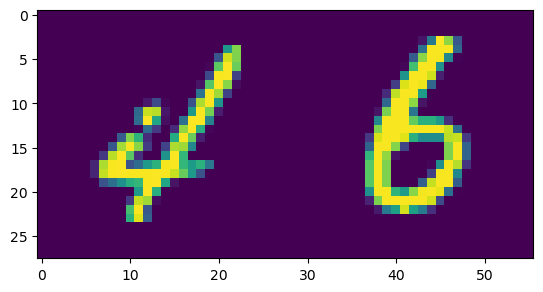

In [3]:
import pandas as pd
import numpy as np
from tensorflow.keras.layers import Conv2D,Dense,Flatten,MaxPool2D,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.losses import SparseCategoricalCrossentropy
data = np.load(r"Image classification\mnist_compressed.npz")

X_train= data["train_images"]/255
X_test = data["test_images"]/255

model = Sequential([
    Conv2D(8,(3,3),input_shape=(28,56,1),activation='relu'),
    MaxPool2D((2,2)),
    Conv2D(16,(3,3),activation='relu'),
    MaxPool2D((2,2)),
    Conv2D(32,(3,3),activation='relu'),
    MaxPool2D((2,2)),
    Flatten(),
    Dense(128,activation='relu'),
    Dense(100,activation = 'softmax')
])

model.compile(optimizer="adam",loss=SparseCategoricalCrossentropy(from_logits=True),metrics=["Accuracy"])
model.fit(X_train,data["train_labels"],epochs=10)
prediction = model.predict(data["test_images"][14].reshape(1, 28, 56, 1))
print(np.argmax(prediction))
print(prediction)
import matplotlib.pyplot as plt
plt.imshow(data["test_images"][14])